In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df1 = pd.read_csv('/content/east_coast.csv')
df2 = pd.read_csv('/content/gulf_of_mexico.csv')

In [3]:
df1

,Date,pm10,CO,SO2,NO2
0,1/1/1993,12.6,0.657766,6.059563,10.674623
1,1/2/1993,37.0,0.706045,7.675674,11.798966
2,1/3/1993,28.0,0.846815,7.849313,13.881085
3,1/4/1993,26.0,0.746543,7.667326,14.251125
4,1/5/1993,19.0,0.881420,5.375442,12.750770
...,...,...,...,...,...
11195,8/27/2023,15.5,0.323333,0.447570,4.230556
11196,8/28/2023,12.4,0.302326,0.350831,4.712865
11197,8/29/2023,14.0,0.299379,0.359028,5.264861
11198,8/30/2023,12.5,0.269396,0.334832,5.429762


In [4]:
df2

,Date,SO2,CO,PM_10,NO2
0,1/1/1993,3.974792,0.453036,15.607143,5.833333
1,1/2/1993,5.495823,0.493590,21.598634,10.333333
2,1/3/1993,3.713232,0.416094,21.598634,7.459524
3,1/4/1993,4.056472,0.871669,21.598634,8.382816
4,1/5/1993,2.470003,0.738601,21.598634,8.864394
...,...,...,...,...,...
11164,7/27/2023,-0.009167,0.581250,22.000000,8.541667
11165,7/28/2023,-0.020000,0.572283,16.000000,11.208334
11166,7/29/2023,-0.027329,0.556250,14.000000,8.070833
11167,7/30/2023,0.051667,0.452084,24.000000,5.088636


In [5]:
df = pd.read_csv('/content/slr_sla_gom_keep_ref_90.csv')
df

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF,date
0,1993.0113,-25.58,NaN,NaN,NaN,NaN,1/4/1993
1,1993.0396,-22.68,NaN,NaN,NaN,NaN,1/14/1993
2,1993.0630,-20.58,NaN,NaN,NaN,NaN,1/23/1993
3,1993.0971,-13.28,NaN,NaN,NaN,NaN,2/4/1993
4,1993.1202,-33.48,NaN,NaN,NaN,NaN,2/12/1993
...,...,...,...,...,...,...,...
1551,2024.0488,43.91,NaN,NaN,NaN,NaN,1/17/2024
1552,2024.0758,12.71,NaN,NaN,NaN,NaN,1/27/2024
1553,2024.1030,39.51,NaN,NaN,NaN,NaN,2/6/2024
1554,2024.1303,25.11,NaN,NaN,NaN,NaN,2/16/2024


In [6]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
import datetime

<ipython-input-7-15c972e327c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime


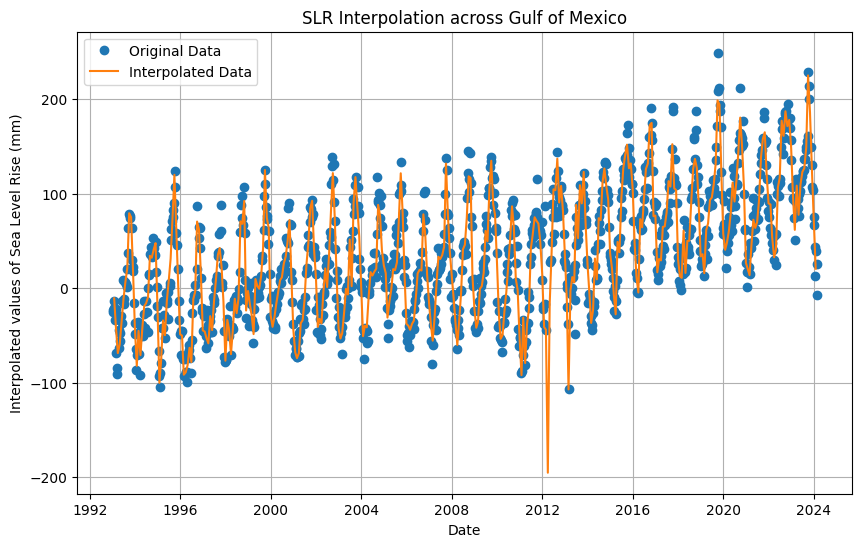

In [7]:
# Assuming you already have a DataFrame named 'df' with columns ['date', 'TOPEX/Poseidon']

# Drop rows with NaN values in 'TOPEX/Poseidon' column
df = df.dropna(subset=['TOPEX/Poseidon'])

# Sort the DataFrame by date
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df = df.sort_values(by='date')  # Sort DataFrame by 'date'

# Remove infinite values in 'TOPEX/Poseidon' column
df = df[np.isfinite(df['TOPEX/Poseidon'])]

# Perform cubic interpolation
cs = CubicSpline(df['date'].values.astype(np.int64), df['TOPEX/Poseidon'].values)
interpolated_dates = pd.date_range(start=df['date'].iloc[0], end=df['date'].iloc[-1], freq='M')
interpolated_values = cs(interpolated_dates.values.astype(np.int64))

# Create a new DataFrame for interpolated data
interpolated_df_GOM = pd.DataFrame({'date': interpolated_dates, 'TOPEX/Poseidon': interpolated_values})

# Plot the interpolated data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['TOPEX/Poseidon'], 'o', label='Original Data')
plt.plot(interpolated_df_GOM['date'], interpolated_df_GOM['TOPEX/Poseidon'], '-', label='Interpolated Data')
plt.title('SLR Interpolation across Gulf of Mexico')
plt.xlabel('Date')
plt.ylabel('Interpolated values of Sea Level Rise (mm)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
interpolated_df_GOM

,date,TOPEX/Poseidon
0,1993-01-31,-10.811556
1,1993-02-28,-41.229686
2,1993-03-31,-68.770164
3,1993-04-30,-59.652331
4,1993-05-31,-35.892569
...,...,...
368,2023-09-30,225.104251
369,2023-10-31,186.093569
370,2023-11-30,127.712184
371,2023-12-31,71.987602


In [9]:
df = pd.read_csv('/content/slr_sla_na_keep_ref.csv')
df

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,Sentinel-6MF,date
0,1993.0129,-16.92,NaN,NaN,NaN,NaN,1/4/1993
1,1993.0412,-9.52,NaN,NaN,NaN,NaN,1/15/1993
2,1993.0644,-35.02,NaN,NaN,NaN,NaN,1/23/1993
3,1993.0978,-35.12,NaN,NaN,NaN,NaN,2/4/1993
4,1993.1213,-38.22,NaN,NaN,NaN,NaN,2/13/1993
...,...,...,...,...,...,...,...
1507,2024.0496,69.26,NaN,NaN,NaN,NaN,1/18/2024
1508,2024.0770,58.06,NaN,NaN,NaN,NaN,1/28/2024
1509,2024.1041,54.26,NaN,NaN,NaN,NaN,2/7/2024
1510,2024.1309,59.76,NaN,NaN,NaN,NaN,2/16/2024


<ipython-input-10-adecd7d47642>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime


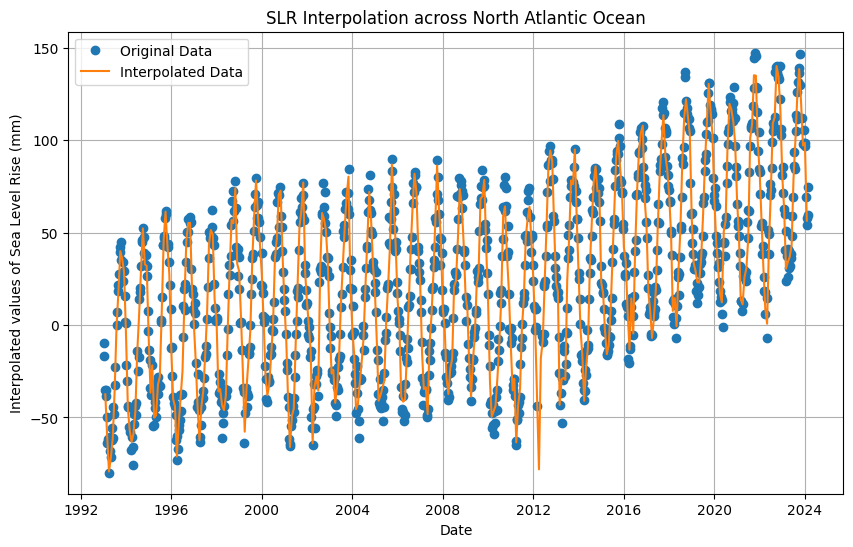

In [10]:
# Assuming you already have a DataFrame named 'df' with columns ['date', 'TOPEX/Poseidon']

# Drop rows with NaN values in 'TOPEX/Poseidon' column
df = df.dropna(subset=['TOPEX/Poseidon'])

# Sort the DataFrame by date
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime
df = df.sort_values(by='date')  # Sort DataFrame by 'date'

# Remove infinite values in 'TOPEX/Poseidon' column
df = df[np.isfinite(df['TOPEX/Poseidon'])]

# Perform cubic interpolation
cs = CubicSpline(df['date'].values.astype(np.int64), df['TOPEX/Poseidon'].values)
interpolated_dates = pd.date_range(start=df['date'].iloc[0], end=df['date'].iloc[-1], freq='M')
interpolated_values = cs(interpolated_dates.values.astype(np.int64))

# Create a new DataFrame for interpolated data
interpolated_df_NA = pd.DataFrame({'date': interpolated_dates, 'TOPEX/Poseidon': interpolated_values})

# Plot the interpolated data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['TOPEX/Poseidon'], 'o', label='Original Data')
plt.plot(interpolated_df_NA['date'], interpolated_df_NA['TOPEX/Poseidon'], '-', label='Interpolated Data')
plt.title('SLR Interpolation across North Atlantic Ocean')
plt.xlabel('Date')
plt.ylabel('Interpolated values of Sea Level Rise (mm)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
interpolated_df_NA

,date,TOPEX/Poseidon
0,1993-01-31,-37.475992
1,1993-02-28,-58.661277
2,1993-03-31,-79.268546
3,1993-04-30,-71.827592
4,1993-05-31,-61.476040
...,...,...
368,2023-09-30,138.625553
369,2023-10-31,120.275926
370,2023-11-30,97.235115
371,2023-12-31,98.697102


In [12]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [13]:
# Merge DataFrames on 'Date' and 'date' columns
merged_df = pd.merge(df2, interpolated_df_GOM, left_on='Date', right_on='date', how='inner')

# Drop the redundant column 'date'
merged_df = merged_df.drop(columns=['date'])

In [14]:
merged_df

,Date,SO2,CO,PM_10,NO2,TOPEX/Poseidon
0,1993-01-31,5.752377,0.648314,22.960000,13.632143,-10.811556
1,1993-02-28,7.284353,0.652205,21.598634,14.701191,-41.229686
2,1993-03-31,3.087459,0.746925,21.598634,9.764210,-68.770164
3,1993-04-30,3.918104,0.779401,29.000000,14.510714,-59.652331
4,1993-05-31,5.086908,0.559294,18.805556,11.498810,-35.892569
...,...,...,...,...,...,...
362,2023-03-31,0.670336,0.325226,29.100000,3.607008,108.413434
363,2023-04-30,0.280754,0.226975,19.900000,2.318201,77.599535
364,2023-05-31,0.492941,0.300428,16.750000,5.844220,109.542032
365,2023-06-30,0.515058,0.339384,25.777778,5.363804,122.979243


In [15]:
merged_df = merged_df.drop(['Date'], axis=1)

In [16]:
merged_df.to_csv('/content/merged_df_GOM.csv')

Prediction of SLR using other features (Gulf of Mexico)

Epoch 1/300
7/7 [==============================] - 16s 351ms/step - loss: 0.2829 - val_loss: 0.3184
Epoch 2/300
7/7 [==============================] - 0s 33ms/step - loss: 0.1226 - val_loss: 0.3010
Epoch 3/300
7/7 [==============================] - 0s 33ms/step - loss: 0.0822 - val_loss: 0.2927
Epoch 4/300
7/7 [==============================] - 0s 34ms/step - loss: 0.0852 - val_loss: 0.2867
Epoch 5/300
7/7 [==============================] - 0s 36ms/step - loss: 0.0652 - val_loss: 0.2640
Epoch 6/300
7/7 [==============================] - 0s 36ms/step - loss: 0.0622 - val_loss: 0.2522
Epoch 7/300
7/7 [==============================] - 0s 43ms/step - loss: 0.0639 - val_loss: 0.2276
Epoch 8/300
7/7 [==============================] - 0s 57ms/step - loss: 0.0493 - val_loss: 0.2153
Epoch 9/300
7/7 [==============================] - 0s 37ms/step - loss: 0.0548 - val_loss: 0.2042
Epoch 10/300
7/7 [==============================] - 0s 33ms/step - loss: 0.0466 - val_loss: 0.1957
Epoch 11/300
7/7 

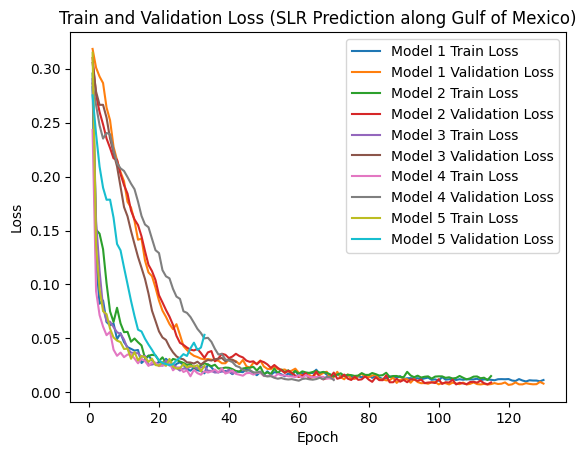

Model 1:
Train Loss: 0.011472189798951149
Validation Loss: 0.008127419278025627
Test Loss: 0.00719846785068512

Model 2:
Train Loss: 0.015110128559172153
Validation Loss: 0.009221617132425308
Test Loss: 0.008167325519025326

Model 3:
Train Loss: 0.018567999824881554
Validation Loss: 0.028083791956305504
Test Loss: 0.03866846486926079

Model 4:
Train Loss: 0.012149294838309288
Validation Loss: 0.011457286775112152
Test Loss: 0.0181114599108696

Model 5:
Train Loss: 0.024572113528847694
Validation Loss: 0.05336301028728485
Test Loss: 0.03701525181531906



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 2s 9ms/step
Ensemble (Simple Averaging) Test Loss: 0.015538674589864996
3/3 [==============================] - 0s 9ms/step
Ensemble (Weighted Averaging) Test Loss: 0.01553867459804579


In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# Let's say your DataFrame is named 'merged_df'

# Function to create and train LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(time_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=32))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to create ensemble prediction
def ensemble_prediction(models, X):
    predictions = np.array([model.predict(X) for model in models])
    return np.mean(predictions, axis=0)

# Load and preprocess data
# Extract predictors and target variable
predictors = merged_df.iloc[:, :-1].values
target = merged_df.iloc[:, -1].values

# Normalize the predictors
scaler = MinMaxScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Reshape target to a 2D array with a single feature
target = target.reshape(-1, 1)

# Normalize the target variable
target = scaler.fit_transform(target)

# Define the number of time steps
time_steps = 10  # Adjust as needed

# Reshape the input data to fit the LSTM model (samples, time steps, features)
n_samples = predictors_scaled.shape[0]
n_features = predictors_scaled.shape[1]

X_reshaped = np.zeros((n_samples - time_steps + 1, time_steps, n_features))
for i in range(time_steps, n_samples + 1):
    X_reshaped[i - time_steps] = predictors_scaled[i - time_steps:i]

# Reshape the target variable accordingly
y_reshaped = target[time_steps - 1:]

# Split the dataset into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Train multiple LSTM models
num_models = 5
models = [create_lstm_model() for _ in range(num_models)]

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train each model and track losses
train_losses = []
val_losses = []
test_losses = []
for model in models:
    history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    test_losses.append(test_loss)

# Plot train and validation loss for each model
for i, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses)):
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, label=f'Model {i+1} Train Loss')
    plt.plot(epochs, val_loss, label=f'Model {i+1} Validation Loss')

plt.title('Train and Validation Loss (SLR Prediction along Gulf of Mexico)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print train, test, and validation loss for each model
for i, (train_loss, val_loss, test_loss) in enumerate(zip(train_losses, val_losses, test_losses)):
    print(f'Model {i+1}:')
    print(f'Train Loss: {train_loss[-1]}')
    print(f'Validation Loss: {val_loss[-1]}')
    print(f'Test Loss: {test_loss}')
    print()

# Save models
for i, model in enumerate(models):
    model.save(f'model_gom_{i+1}.hdf5')
    model.save(f'model_gom_{i+1}.keras')

# Ensemble Approach 1: Simple Averaging
ensemble_prediction_simple_avg = ensemble_prediction(models, X_test)
ensemble_loss_simple_avg = mean_squared_error(y_test, ensemble_prediction_simple_avg)
print('Ensemble (Simple Averaging) Test Loss:', ensemble_loss_simple_avg)

# Ensemble Approach 2: Weighted Averaging
# Assign equal weights to each model
weights = np.ones(num_models) / num_models
ensemble_prediction_weighted_avg = np.average([model.predict(X_test) for model in models], axis=0, weights=weights)
ensemble_loss_weighted_avg = mean_squared_error(y_test, ensemble_prediction_weighted_avg)
print('Ensemble (Weighted Averaging) Test Loss:', ensemble_loss_weighted_avg)

Training Model 1...
Epoch 1/300
7/7 [==============================] - 24s 565ms/step - loss: 0.3103 - val_loss: 0.3137
Epoch 2/300
7/7 [==============================] - 0s 66ms/step - loss: 0.1316 - val_loss: 0.2843
Epoch 3/300
7/7 [==============================] - 0s 66ms/step - loss: 0.0891 - val_loss: 0.2817
Epoch 4/300
7/7 [==============================] - 0s 67ms/step - loss: 0.0763 - val_loss: 0.2740
Epoch 5/300
7/7 [==============================] - 0s 68ms/step - loss: 0.0645 - val_loss: 0.2685
Epoch 6/300
7/7 [==============================] - 0s 65ms/step - loss: 0.0563 - val_loss: 0.2647
Epoch 7/300
7/7 [==============================] - 1s 100ms/step - loss: 0.0462 - val_loss: 0.2742
Epoch 8/300
7/7 [==============================] - 1s 95ms/step - loss: 0.0407 - val_loss: 0.2677
Epoch 9/300
7/7 [==============================] - 1s 95ms/step - loss: 0.0446 - val_loss: 0.2631
Epoch 10/300
7/7 [==============================] - 1s 90ms/step - loss: 0.0386 - val_loss: 0.2

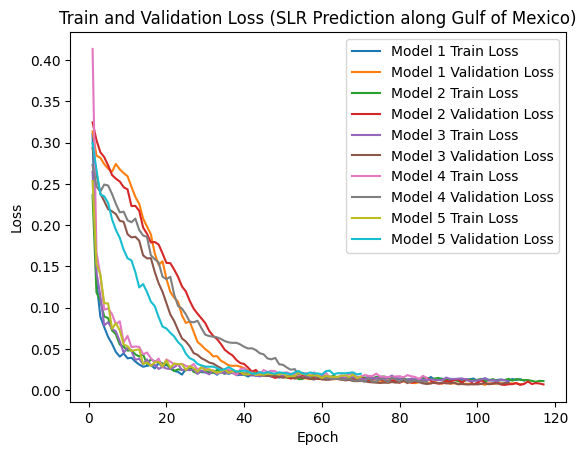

Model 1:
Train Loss: 0.011585797183215618
Validation Loss: 0.007671571336686611
Test Loss: 0.007592367473989725

Model 2:
Train Loss: 0.0109729478135705
Validation Loss: 0.006936101242899895
Test Loss: 0.007383530493825674

Model 3:
Train Loss: 0.010218477807939053
Validation Loss: 0.008649607188999653
Test Loss: 0.007710238918662071

Model 4:
Train Loss: 0.014391767792403698
Validation Loss: 0.010004324838519096
Test Loss: 0.013517207466065884

Model 5:
Train Loss: 0.016265537589788437
Validation Loss: 0.019908107817173004
Test Loss: 0.028934942558407784



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 2s 10ms/step
Ensemble (Simple Averaging) Test Loss: 0.009488911041415514
3/3 [==============================] - 0s 8ms/step
Ensemble (Weighted Averaging) Test Loss: 0.009488911970317563


In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# Let's say your DataFrame is named 'merged_df'

# Function to create and train LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(time_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=32))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to create ensemble prediction
def ensemble_prediction(models, X):
    predictions = np.array([model.predict(X) for model in models])
    return np.mean(predictions, axis=0)

# Load and preprocess data
# Extract predictors and target variable
predictors = merged_df.iloc[:, :-1].values
target = merged_df.iloc[:, -1].values

# Normalize the predictors
scaler = MinMaxScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Reshape target to a 2D array with a single feature
target = target.reshape(-1, 1)

# Normalize the target variable
target = scaler.fit_transform(target)

# Define the number of time steps
time_steps = 10  # Adjust as needed

# Reshape the input data to fit the LSTM model (samples, time steps, features)
n_samples = predictors_scaled.shape[0]
n_features = predictors_scaled.shape[1]

X_reshaped = np.zeros((n_samples - time_steps + 1, time_steps, n_features))
for i in range(time_steps, n_samples + 1):
    X_reshaped[i - time_steps] = predictors_scaled[i - time_steps:i]

# Reshape the target variable accordingly
y_reshaped = target[time_steps - 1:]

# Split the dataset into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Train multiple LSTM models
num_models = 5
models = [create_lstm_model() for _ in range(num_models)]

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train each model and track losses
train_losses = []
val_losses = []
test_losses = []
for i, model in enumerate(models):
    print(f"Training Model {i+1}...")
    history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    test_losses.append(test_loss)
    print(f"Model {i+1} training completed.\n")

    # Print specifications of each model
    print(f"Specifications of Model {i+1}:")
    model.summary()
    print()

# Plot train and validation loss for each model
for i, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses)):
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, label=f'Model {i+1} Train Loss')
    plt.plot(epochs, val_loss, label=f'Model {i+1} Validation Loss')

plt.title('Train and Validation Loss (SLR Prediction along Gulf of Mexico)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print train, test, and validation loss for each model
for i, (train_loss, val_loss, test_loss) in enumerate(zip(train_losses, val_losses, test_losses)):
    print(f'Model {i+1}:')
    print(f'Train Loss: {train_loss[-1]}')
    print(f'Validation Loss: {val_loss[-1]}')
    print(f'Test Loss: {test_loss}')
    print()

# Save models
for i, model in enumerate(models):
    model.save(f'model_gom_{i+1}.hdf5')
    model.save(f'model_gom_{i+1}.keras')

# Ensemble Approach 1: Simple Averaging
ensemble_prediction_simple_avg = ensemble_prediction(models, X_test)
ensemble_loss_simple_avg = mean_squared_error(y_test, ensemble_prediction_simple_avg)
print('Ensemble (Simple Averaging) Test Loss:', ensemble_loss_simple_avg)

# Ensemble Approach 2: Weighted Averaging
# Assign equal weights to each model
weights = np.ones(num_models) / num_models
ensemble_prediction_weighted_avg = np.average([model.predict(X_test) for model in models], axis=0, weights=weights)
ensemble_loss_weighted_avg = mean_squared_error(y_test, ensemble_prediction_weighted_avg)
print('Ensemble (Weighted Averaging) Test Loss:', ensemble_loss_weighted_avg)

In [27]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [28]:
# Merge DataFrames on 'Date' and 'date' columns
merged_df_1 = pd.merge(df1, interpolated_df_NA, left_on='Date', right_on='date', how='inner')

# Drop the redundant column 'date'
merged_df_1 = merged_df_1.drop(columns=['date'])

In [29]:
merged_df_1

,Date,pm10,CO,SO2,NO2,TOPEX/Poseidon
0,1993-01-31,17.256757,0.781394,8.529898,16.601223,-37.475992
1,1993-02-28,33.000000,0.877357,9.271102,17.017436,-58.661277
2,1993-03-31,37.000000,0.923779,5.949055,16.881933,-79.268546
3,1993-04-30,31.000000,0.928921,5.638381,20.781549,-71.827592
4,1993-05-31,14.013889,0.569160,3.080950,9.053154,-61.476040
...,...,...,...,...,...,...
363,2023-04-30,13.380952,0.252019,0.322746,3.880940,36.934231
364,2023-05-31,19.666667,0.317637,0.416024,9.093116,43.397932
365,2023-06-30,29.266667,0.691691,0.716667,10.094120,79.080703
366,2023-07-31,18.500000,0.272131,0.812764,9.783333,100.083608


In [30]:
merged_df_1 = merged_df_1.drop(['Date'], axis=1)

In [31]:
merged_df_1.to_csv('/content/merged_df_NA.csv')

Prediiction of SLR using other features (North Atlantic Ocean)

Epoch 1/300
7/7 [==============================] - 13s 383ms/step - loss: 0.2784 - val_loss: 0.1813
Epoch 2/300
7/7 [==============================] - 0s 39ms/step - loss: 0.1219 - val_loss: 0.1680
Epoch 3/300
7/7 [==============================] - 0s 39ms/step - loss: 0.1315 - val_loss: 0.1637
Epoch 4/300
7/7 [==============================] - 0s 36ms/step - loss: 0.0915 - val_loss: 0.1524
Epoch 5/300
7/7 [==============================] - 0s 39ms/step - loss: 0.0883 - val_loss: 0.1546
Epoch 6/300
7/7 [==============================] - 0s 37ms/step - loss: 0.0654 - val_loss: 0.1477
Epoch 7/300
7/7 [==============================] - 0s 36ms/step - loss: 0.0636 - val_loss: 0.1402
Epoch 8/300
7/7 [==============================] - 0s 37ms/step - loss: 0.0548 - val_loss: 0.1370
Epoch 9/300
7/7 [==============================] - 0s 40ms/step - loss: 0.0389 - val_loss: 0.1352
Epoch 10/300
7/7 [==============================] - 0s 54ms/step - loss: 0.0454 - val_loss: 0.1300
Epoch 11/300
7/7 

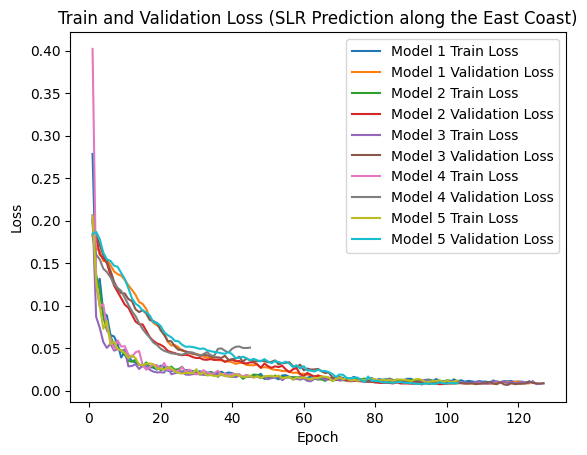

Model 1:
Train Loss: 0.010792852379381657
Validation Loss: 0.008477795869112015
Test Loss: 0.006285449024289846

Model 2:
Train Loss: 0.009440410882234573
Validation Loss: 0.009125018492341042
Test Loss: 0.006440790370106697

Model 3:
Train Loss: 0.008468258194625378
Validation Loss: 0.008513434790074825
Test Loss: 0.0052419803105294704

Model 4:
Train Loss: 0.015926292166113853
Validation Loss: 0.050487175583839417
Test Loss: 0.053918786346912384

Model 5:
Train Loss: 0.011967928148806095
Validation Loss: 0.008940611034631729
Test Loss: 0.006332132965326309



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 2s 9ms/step
Ensemble (Simple Averaging) Test Loss: 0.007538991973104857
3/3 [==============================] - 0s 10ms/step
Ensemble (Weighted Averaging) Test Loss: 0.007538991464786681


In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
# Let's say your DataFrame is named 'merged_df'

# Function to create and train LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(time_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=32))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to create ensemble prediction
def ensemble_prediction(models, X):
    predictions = np.array([model.predict(X) for model in models])
    return np.mean(predictions, axis=0)

# Load and preprocess data
# Extract predictors and target variable
predictors = merged_df_1.iloc[:, :-1].values
target = merged_df_1.iloc[:, -1].values

# Normalize the predictors
scaler = MinMaxScaler()
predictors_scaled = scaler.fit_transform(predictors)

# Reshape target to a 2D array with a single feature
target = target.reshape(-1, 1)

# Normalize the target variable
target = scaler.fit_transform(target)

# Define the number of time steps
time_steps = 10  # Adjust as needed

# Reshape the input data to fit the LSTM model (samples, time steps, features)
n_samples = predictors_scaled.shape[0]
n_features = predictors_scaled.shape[1]

X_reshaped = np.zeros((n_samples - time_steps + 1, time_steps, n_features))
for i in range(time_steps, n_samples + 1):
    X_reshaped[i - time_steps] = predictors_scaled[i - time_steps:i]

# Reshape the target variable accordingly
y_reshaped = target[time_steps - 1:]

# Split the dataset into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Train multiple LSTM models
num_models = 5
models = [create_lstm_model() for _ in range(num_models)]

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train each model and track losses
train_losses = []
val_losses = []
test_losses = []
for model in models:
    history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), verbose=1, callbacks=[early_stopping])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    test_losses.append(test_loss)

# Plot train and validation loss for each model
for i, (train_loss, val_loss) in enumerate(zip(train_losses, val_losses)):
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs, train_loss, label=f'Model {i+1} Train Loss')
    plt.plot(epochs, val_loss, label=f'Model {i+1} Validation Loss')

plt.title('Train and Validation Loss (SLR Prediction along the East Coast)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print train, test, and validation loss for each model
for i, (train_loss, val_loss, test_loss) in enumerate(zip(train_losses, val_losses, test_losses)):
    print(f'Model {i+1}:')
    print(f'Train Loss: {train_loss[-1]}')
    print(f'Validation Loss: {val_loss[-1]}')
    print(f'Test Loss: {test_loss}')
    print()

# Save models
for i, model in enumerate(models):
    model.save(f'model_gom_{i+1}.hdf5')
    model.save(f'model_gom_{i+1}.keras')

# Ensemble Approach 1: Simple Averaging
ensemble_prediction_simple_avg = ensemble_prediction(models, X_test)
ensemble_loss_simple_avg = mean_squared_error(y_test, ensemble_prediction_simple_avg)
print('Ensemble (Simple Averaging) Test Loss:', ensemble_loss_simple_avg)

# Ensemble Approach 2: Weighted Averaging
# Assign equal weights to each model
weights = np.ones(num_models) / num_models
ensemble_prediction_weighted_avg = np.average([model.predict(X_test) for model in models], axis=0, weights=weights)
ensemble_loss_weighted_avg = mean_squared_error(y_test, ensemble_prediction_weighted_avg)
print('Ensemble (Weighted Averaging) Test Loss:', ensemble_loss_weighted_avg)

In [151]:
interpolated_df_NA

,date,TOPEX/Poseidon
0,1993-01-31,-37.475992
1,1993-02-28,-58.661277
2,1993-03-31,-79.268546
3,1993-04-30,-71.827592
4,1993-05-31,-61.476040
...,...,...
368,2023-09-30,138.625553
369,2023-10-31,120.275926
370,2023-11-30,97.235115
371,2023-12-31,98.697102


TOPEX/Poseidon    float64
dtype: object


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Epoch 1/100
12/12 [==============================] - 7s 25ms/step - loss: 0.1190
Epoch 2/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0663
Epoch 3/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0553
Epoch 4/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0504
Epoch 5/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0478
Epoch 6/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0477
Epoch 7/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0469
Epoch 8/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0460
Epoch 9/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0451
Epoch 10/100
12/12 [==============================] - 0s 33ms/step - loss: 0.0447
Epoch 11/100
12/12 [==============================] - 0s 37ms/step - loss: 0.0440
Epoch 12/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0423
Epoch 13/100
12/12 [=====

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


1/1 [==============================] - 0s 48ms/step


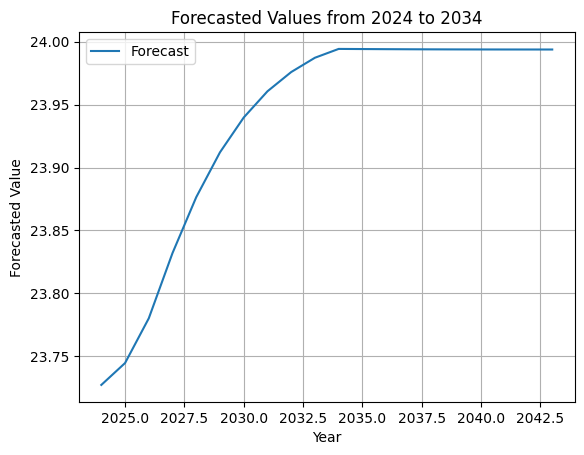

In [165]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from numpy.linalg import LinAlgError

# Assuming 'interpolated_df_NA' is your DataFrame containing the time series data
# Replace 'date_column' with the actual name of your date column
interpolated_df_NA['date'] = pd.to_datetime(interpolated_df_NA['date'], format='%Y%m%d')

# Set the index to the datetime column
interpolated_df_NA.set_index('date', inplace=True)

# Check data types of DataFrame columns
print(interpolated_df_NA.dtypes)

# Select the column you want to use for forecasting
time_series_data = interpolated_df_NA['TOPEX/Poseidon']

# Check if the series is empty
if time_series_data.empty:
    print("Error: The series is empty.")
    exit()

# Train-test split
train = time_series_data['1993-01-04':'2024-02-22']
test_start = pd.to_datetime('2024-02-23')
test_end = pd.to_datetime('2044-12-31')
test = time_series_data[test_start:test_end]

# SARIMA model training function
def train_model_SARIMA(train_data):
    try:
        model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        fitted_model = model.fit(maxiter=1000)  # Increase max iterations
        return fitted_model
    except LinAlgError as e:
        print("LinAlgError:", e)
        return None  # Return None if model fitting fails

# LSTM model training function
def train_model_LSTM(train_data):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

    # Prepare data for LSTM
    def create_dataset(data, time_steps=1):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:(i + time_steps), 0])
            y.append(data[i + time_steps, 0])
        return np.array(X), np.array(y)

    time_steps = 10
    X_train, y_train = create_dataset(train_data_scaled, time_steps)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32)

    return model

# Combine forecasts function
def combine_forecasts(forecast_1, forecast_2, forecast_3, year):
        weight_1 = 0.4
        weight_2 = 0.4
        weight_3 = 0.2
        return (weight_1 * forecast_1) + (weight_2 * forecast_2) + (weight_3 * forecast_3)

# Check if the training data is empty
if train.empty:
    print("Error: The training data is empty.")
    exit()

# Step 2: Choose Base Models
base_model_1 = train_model_SARIMA(train)
base_model_2 = train_model_LSTM(train)

# Check if the base models are None
if base_model_1 is None or base_model_2 is None:
    print("Error: Model training failed.")
    exit()

# Step 3: Exponential Smoothing
model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fitted_model_ets = model_ets.fit()

# Forecasting
forecasts = []
for year in range(2024, 2044):
    forecast_1 = base_model_1.forecast(steps=1)[-1]
    forecast_2 = base_model_2.predict(np.array(train[-10:]).reshape(1, -1, 1))[0][0]
    forecast_3 = fitted_model_ets.forecast(1)[0]
    combined_forecast = combine_forecasts(forecast_1, forecast_2, forecast_3, year)
    forecasts.append(combined_forecast)
    train = pd.concat([train, pd.Series([combined_forecast], index=[pd.to_datetime(f'{year}-01-01')])])

# Post-processing, evaluation, etc.
# Display forecasts
forecast_years = range(2024, 2044)
plt.plot(forecast_years, forecasts, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values from 2024 to 2034')
plt.legend()
plt.grid(True)
plt.show()

In [168]:
# Post-processing: Add forecasts to the original training dataset
for year, forecast_value in zip(range(2024, 2044), forecasts):
    train.loc[pd.to_datetime(f'{year}-01-01')] = forecast_value

In [169]:
train

1993-01-31   -37.475992
1993-02-28   -58.661277
1993-03-31   -79.268546
1993-04-30   -71.827592
1993-05-31   -61.476040
                ...    
2039-01-01    23.993866
2040-01-01    23.993832
2041-01-01    23.993810
2042-01-01    23.993796
2043-01-01    23.993789
Length: 393, dtype: float64

In [170]:
train.to_csv('\content\train_1.csv')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Epoch 1/100
12/12 [==============================] - 11s 26ms/step - loss: 0.1494
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0588
Epoch 3/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0526
Epoch 4/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0493
Epoch 5/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0486
Epoch 6/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0479
Epoch 7/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0483
Epoch 8/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0470
Epoch 9/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0464
Epoch 10/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0451
Epoch 11/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0450
Epoch 12/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0436
Epoch 13/100
12/12 [====

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


1/1 [==============================] - 0s 61ms/step


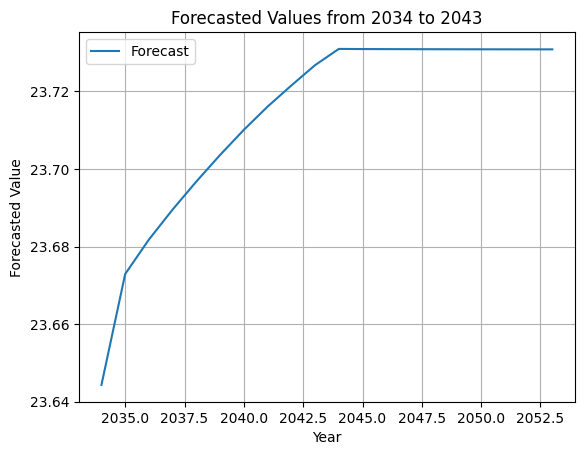

In [171]:
# Train-test split
train = time_series_data['1993-01-31':'2033-01-01']
test_start = pd.to_datetime('2034-02-23')
test_end = pd.to_datetime('2054-12-31')
test = time_series_data[test_start:test_end]

# SARIMA model training function
def train_model_SARIMA(train_data):
    try:
        model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        fitted_model = model.fit(maxiter=1000)  # Increase max iterations
        return fitted_model
    except LinAlgError as e:
        print("LinAlgError:", e)
        return None  # Return None if model fitting fails

# LSTM model training function
def train_model_LSTM(train_data):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

    # Prepare data for LSTM
    def create_dataset(data, time_steps=1):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:(i + time_steps), 0])
            y.append(data[i + time_steps, 0])
        return np.array(X), np.array(y)

    time_steps = 10
    X_train, y_train = create_dataset(train_data_scaled, time_steps)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32)

    return model

# Combine forecasts function
def combine_forecasts(forecast_1, forecast_2, forecast_3, year):
    weight_1 = 0.4
    weight_2 = 0.4
    weight_3 = 0.2
    return (weight_1 * forecast_1) + (weight_2 * forecast_2) + (weight_3 * forecast_3)

# Check if the training data is empty
if train.empty:
    print("Error: The training data is empty.")
    exit()

# Step 2: Choose Base Models
base_model_1 = train_model_SARIMA(train)
base_model_2 = train_model_LSTM(train)

# Check if the base models are None
if base_model_1 is None or base_model_2 is None:
    print("Error: Model training failed.")
    exit()

# Step 3: Exponential Smoothing
model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fitted_model_ets = model_ets.fit()

# Step 4: Forecasting
forecasts = []
for year in range(2034, 2054):  # Change the range to forecast for the next 10 years (2034-2043)
    forecast_1 = base_model_1.forecast(steps=1)[-1]
    forecast_2 = base_model_2.predict(np.array(train[-10:]).reshape(1, -1, 1))[0][0]
    forecast_3 = fitted_model_ets.forecast(1)[0]
    combined_forecast = combine_forecasts(forecast_1, forecast_2, forecast_3, year)
    forecasts.append(combined_forecast)
    train = pd.concat([train, pd.Series([combined_forecast], index=[pd.to_datetime(f'{year}-01-01')])])

# Post-processing, evaluation, etc.
# Display forecasts
forecast_years = range(2034, 2054)
plt.plot(forecast_years, forecasts, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values from 2034 to 2043')
plt.legend()
plt.grid(True)
plt.show()

In [172]:
# Post-processing: Add forecasts to the original training dataset
for year, forecast_value in zip(range(2034, 2054), forecasts):
    train.loc[pd.to_datetime(f'{year}-01-01')] = forecast_value

In [173]:
train

1993-01-31   -37.475992
1993-02-28   -58.661277
1993-03-31   -79.268546
1993-04-30   -71.827592
1993-05-31   -61.476040
                ...    
2049-01-01    23.730886
2050-01-01    23.730876
2051-01-01    23.730869
2052-01-01    23.730864
2053-01-01    23.730860
Length: 393, dtype: float64

In [174]:
train.to_csv('/content/train_2.csv')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Epoch 1/100
12/12 [==============================] - 12s 24ms/step - loss: 0.1616
Epoch 2/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0648
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0549
Epoch 4/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0501
Epoch 5/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0493
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0486
Epoch 7/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0484
Epoch 8/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0475
Epoch 9/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0477
Epoch 10/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0465
Epoch 11/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0462
Epoch 12/100
12/12 [==============================] - 0s 35ms/step - loss: 0.0461
Epoch 13/100
12/12 [====

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


1/1 [==============================] - 0s 89ms/step


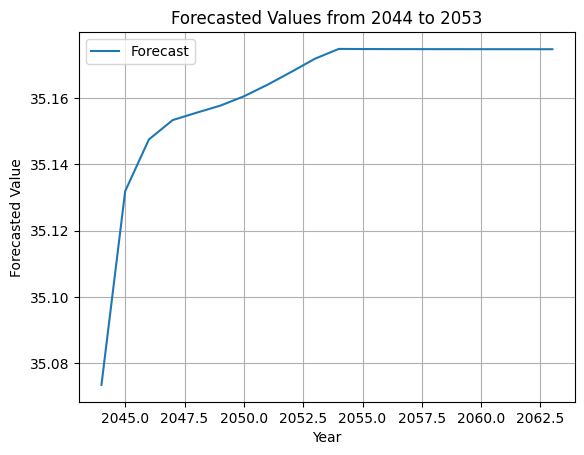

In [175]:
# Train-test split
train = time_series_data['1993-01-31':'2043-01-01']  # Extend the training period
test_start = pd.to_datetime('2024-02-23')
test_end = pd.to_datetime('2034-12-31')
test = time_series_data[test_start:test_end]

# SARIMA model training function
def train_model_SARIMA(train_data):
    try:
        model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        fitted_model = model.fit(maxiter=1000)  # Increase max iterations
        return fitted_model
    except LinAlgError as e:
        print("LinAlgError:", e)
        return None  # Return None if model fitting fails

# LSTM model training function
def train_model_LSTM(train_data):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

    # Prepare data for LSTM
    def create_dataset(data, time_steps=1):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:(i + time_steps), 0])
            y.append(data[i + time_steps, 0])
        return np.array(X), np.array(y)

    time_steps = 10
    X_train, y_train = create_dataset(train_data_scaled, time_steps)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32)

    return model

# Combine forecasts function
def combine_forecasts(forecast_1, forecast_2, forecast_3, year):
    weight_1 = 0.4
    weight_2 = 0.3
    weight_3 = 0.5
    return (weight_1 * forecast_1) + (weight_2 * forecast_2) + (weight_3 * forecast_3)

# Check if the training data is empty
if train.empty:
    print("Error: The training data is empty.")
    exit()

# Step 2: Choose Base Models
base_model_1 = train_model_SARIMA(train)
base_model_2 = train_model_LSTM(train)

# Check if the base models are None
if base_model_1 is None or base_model_2 is None:
    print("Error: Model training failed.")
    exit()

# Step 3: Exponential Smoothing
model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fitted_model_ets = model_ets.fit()

# Step 4: Forecasting
forecasts = []
for year in range(2044, 2064):  # Change the range to forecast for the next 10 years (2044-2053)
    forecast_1 = base_model_1.forecast(steps=1)[-1]
    forecast_2 = base_model_2.predict(np.array(train[-10:]).reshape(1, -1, 1))[0][0]
    forecast_3 = fitted_model_ets.forecast(1)[0]
    combined_forecast = combine_forecasts(forecast_1, forecast_2, forecast_3, year)
    forecasts.append(combined_forecast)
    train = pd.concat([train, pd.Series([combined_forecast], index=[pd.to_datetime(f'{year}-01-01')])])

# Post-processing, evaluation, etc.
# Display forecasts
forecast_years = range(2044, 2064)
plt.plot(forecast_years, forecasts, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values from 2044 to 2053')
plt.legend()
plt.grid(True)
plt.show()

In [176]:
# Post-processing: Add forecasts to the original training dataset
for year, forecast_value in zip(range(2044, 2064), forecasts):
    train.loc[pd.to_datetime(f'{year}-01-01')] = forecast_value

In [177]:
train.to_csv('/content/train_3.csv')

In [178]:
train

1993-01-31   -37.475992
1993-02-28   -58.661277
1993-03-31   -79.268546
1993-04-30   -71.827592
1993-05-31   -61.476040
                ...    
2059-01-01    35.174754
2060-01-01    35.174749
2061-01-01    35.174744
2062-01-01    35.174741
2063-01-01    35.174739
Length: 393, dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Epoch 1/100
12/12 [==============================] - 12s 29ms/step - loss: 0.1394
Epoch 2/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0638
Epoch 3/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0551
Epoch 4/100
12/12 [==============================] - 0s 31ms/step - loss: 0.0506
Epoch 5/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0492
Epoch 6/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0480
Epoch 7/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0470
Epoch 8/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0467
Epoch 9/100
12/12 [==============================] - 0s 32ms/step - loss: 0.0457
Epoch 10/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0446
Epoch 11/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0438
Epoch 12/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0423
Epoch 13/100
12/12 [====

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


1/1 [==============================] - 0s 91ms/step


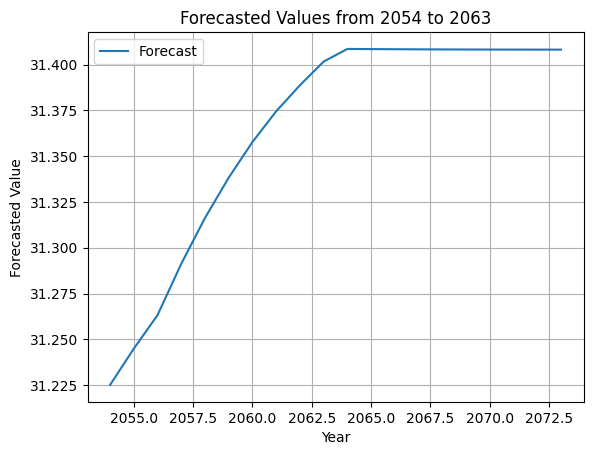

In [179]:
# Extend the training period to include data until the end of 2053
train = time_series_data['1993-01-31':'2053-12-31']

# SARIMA model training function
def train_model_SARIMA(train_data):
    try:
        model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        fitted_model = model.fit(maxiter=1000)  # Increase max iterations
        return fitted_model
    except LinAlgError as e:
        print("LinAlgError:", e)
        return None  # Return None if model fitting fails

# LSTM model training function
def train_model_LSTM(train_data):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

    # Prepare data for LSTM
    def create_dataset(data, time_steps=1):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:(i + time_steps), 0])
            y.append(data[i + time_steps, 0])
        return np.array(X), np.array(y)

    time_steps = 10
    X_train, y_train = create_dataset(train_data_scaled, time_steps)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32)

    return model

# Combine forecasts function
def combine_forecasts(forecast_1, forecast_2, forecast_3, year):
    weight_1 = 0.4
    weight_2 = 0.3
    weight_3 = 0.4
    return (weight_1 * forecast_1) + (weight_2 * forecast_2) + (weight_3 * forecast_3)

# Check if the training data is empty
if train.empty:
    print("Error: The training data is empty.")
    exit()

# Step 2: Choose Base Models
base_model_1 = train_model_SARIMA(train)
base_model_2 = train_model_LSTM(train)

# Check if the base models are None
if base_model_1 is None or base_model_2 is None:
    print("Error: Model training failed.")
    exit()

# Step 3: Exponential Smoothing
model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fitted_model_ets = model_ets.fit()

# Step 4: Forecasting
forecasts = []
for year in range(2054, 2074):  # Change the range to forecast for the next 10 years (2054-2063)
    forecast_1 = base_model_1.forecast(steps=1)[-1]
    forecast_2 = base_model_2.predict(np.array(train[-10:]).reshape(1, -1, 1))[0][0]
    forecast_3 = fitted_model_ets.forecast(1)[0]
    combined_forecast = combine_forecasts(forecast_1, forecast_2, forecast_3, year)
    forecasts.append(combined_forecast)
    train = pd.concat([train, pd.Series([combined_forecast], index=[pd.to_datetime(f'{year}-01-01')])])

# Post-processing, evaluation, etc.
# Display forecasts
forecast_years = range(2054, 2074)
plt.plot(forecast_years, forecasts, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values from 2054 to 2063')
plt.legend()
plt.grid(True)
plt.show()

In [180]:
# Post-processing: Add forecasts to the original training dataset
for year, forecast_value in zip(range(2054, 2074), forecasts):
    train.loc[pd.to_datetime(f'{year}-01-01')] = forecast_value

In [181]:
train

1993-01-31   -37.475992
1993-02-28   -58.661277
1993-03-31   -79.268546
1993-04-30   -71.827592
1993-05-31   -61.476040
                ...    
2069-01-01    31.408316
2070-01-01    31.408287
2071-01-01    31.408267
2072-01-01    31.408253
2073-01-01    31.408245
Length: 393, dtype: float64

In [182]:
train.to_csv('/content/train_4.csv')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Epoch 1/100
12/12 [==============================] - 12s 27ms/step - loss: 0.1385
Epoch 2/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0673
Epoch 3/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0569
Epoch 4/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0496
Epoch 5/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0484
Epoch 6/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0484
Epoch 7/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0472
Epoch 8/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0466
Epoch 9/100
12/12 [==============================] - 0s 20ms/step - loss: 0.0463
Epoch 10/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0459
Epoch 11/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0455
Epoch 12/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0442
Epoch 13/100
12/12 [====

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


1/1 [==============================] - 0s 111ms/step


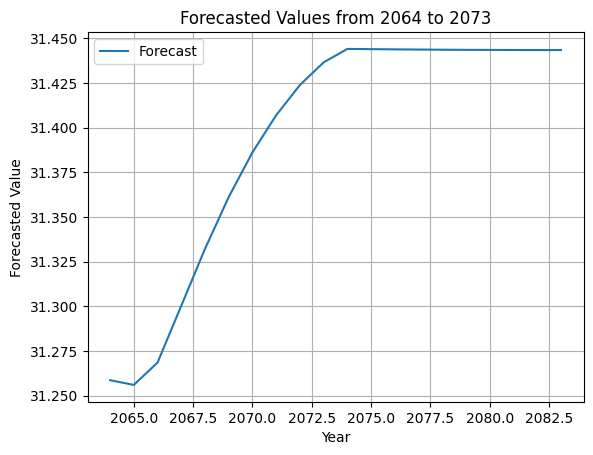

In [183]:
# Extend the training period to include data until the end of 2053
train = time_series_data['1993-01-31':'2063-01-01']

# SARIMA model training function
def train_model_SARIMA(train_data):
    try:
        model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        fitted_model = model.fit(maxiter=1000)  # Increase max iterations
        return fitted_model
    except LinAlgError as e:
        print("LinAlgError:", e)
        return None  # Return None if model fitting fails

# LSTM model training function
def train_model_LSTM(train_data):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

    # Prepare data for LSTM
    def create_dataset(data, time_steps=1):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:(i + time_steps), 0])
            y.append(data[i + time_steps, 0])
        return np.array(X), np.array(y)

    time_steps = 10
    X_train, y_train = create_dataset(train_data_scaled, time_steps)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32)

    return model

# Combine forecasts function
def combine_forecasts(forecast_1, forecast_2, forecast_3, year):
    weight_1 = 0.4
    weight_2 = 0.3
    weight_3 = 0.4
    return (weight_1 * forecast_1) + (weight_2 * forecast_2) + (weight_3 * forecast_3)

# Check if the training data is empty
if train.empty:
    print("Error: The training data is empty.")
    exit()

# Step 2: Choose Base Models
base_model_1 = train_model_SARIMA(train)
base_model_2 = train_model_LSTM(train)

# Check if the base models are None
if base_model_1 is None or base_model_2 is None:
    print("Error: Model training failed.")
    exit()

# Step 3: Exponential Smoothing
model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fitted_model_ets = model_ets.fit()

# Step 4: Forecasting
forecasts = []
for year in range(2064, 2084):  # Change the range to forecast for the next 10 years (2064-2073)
    forecast_1 = base_model_1.forecast(steps=1)[-1]
    forecast_2 = base_model_2.predict(np.array(train[-10:]).reshape(1, -1, 1))[0][0]
    forecast_3 = fitted_model_ets.forecast(1)[0]
    combined_forecast = combine_forecasts(forecast_1, forecast_2, forecast_3, year)
    forecasts.append(combined_forecast)
    train = pd.concat([train, pd.Series([combined_forecast], index=[pd.to_datetime(f'{year}-01-01')])])

# Post-processing, evaluation, etc.
# Display forecasts
forecast_years = range(2064, 2084)
plt.plot(forecast_years, forecasts, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values from 2064 to 2073')
plt.legend()
plt.grid(True)
plt.show()

In [184]:
# Post-processing: Add forecasts to the original training dataset
for year, forecast_value in zip(range(2064, 2084), forecasts):
    train.loc[pd.to_datetime(f'{year}-01-01')] = forecast_value

In [185]:
train

1993-01-31   -37.475992
1993-02-28   -58.661277
1993-03-31   -79.268546
1993-04-30   -71.827592
1993-05-31   -61.476040
                ...    
2079-01-01    31.443474
2080-01-01    31.443422
2081-01-01    31.443387
2082-01-01    31.443365
2083-01-01    31.443353
Length: 393, dtype: float64

In [186]:
train.to_csv('/content/train_5.csv')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Epoch 1/100
12/12 [==============================] - 11s 23ms/step - loss: 0.1359
Epoch 2/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0609
Epoch 3/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0528
Epoch 4/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0503
Epoch 5/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0485
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0485
Epoch 7/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0472
Epoch 8/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0469
Epoch 9/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0455
Epoch 10/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0448
Epoch 11/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0433
Epoch 12/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0418
Epoch 13/100
12/12 [====

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


1/1 [==============================] - 0s 55ms/step


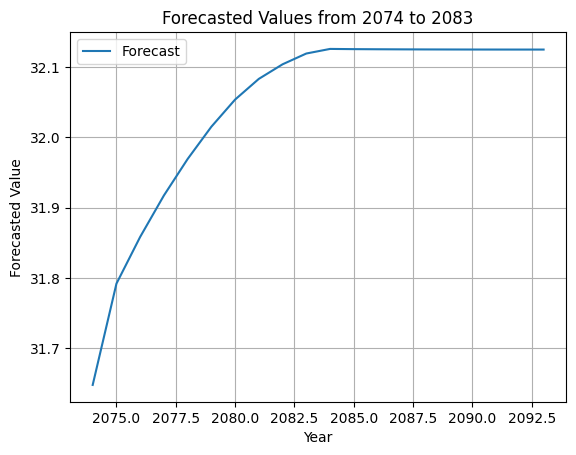

In [187]:
# Extend the training period to include data until the end of 2053
train = time_series_data['1993-01-31':'2073-01-01']

# SARIMA model training function
def train_model_SARIMA(train_data):
    try:
        model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        fitted_model = model.fit(maxiter=1000)  # Increase max iterations
        return fitted_model
    except LinAlgError as e:
        print("LinAlgError:", e)
        return None  # Return None if model fitting fails

# LSTM model training function
def train_model_LSTM(train_data):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

    # Prepare data for LSTM
    def create_dataset(data, time_steps=1):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:(i + time_steps), 0])
            y.append(data[i + time_steps, 0])
        return np.array(X), np.array(y)

    time_steps = 10
    X_train, y_train = create_dataset(train_data_scaled, time_steps)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32)

    return model

# Combine forecasts function
def combine_forecasts(forecast_1, forecast_2, forecast_3, year):
    weight_1 = 0.4
    weight_2 = 0.5
    weight_3 = 0.4
    return (weight_1 * forecast_1) + (weight_2 * forecast_2) + (weight_3 * forecast_3)

# Check if the training data is empty
if train.empty:
    print("Error: The training data is empty.")
    exit()

# Step 2: Choose Base Models
base_model_1 = train_model_SARIMA(train)
base_model_2 = train_model_LSTM(train)

# Check if the base models are None
if base_model_1 is None or base_model_2 is None:
    print("Error: Model training failed.")
    exit()

# Step 3: Exponential Smoothing
model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fitted_model_ets = model_ets.fit()

# Step 4: Forecasting
forecasts = []
for year in range(2074, 2094):  # Change the range to forecast for the next 10 years (2064-2073)
    forecast_1 = base_model_1.forecast(steps=1)[-1]
    forecast_2 = base_model_2.predict(np.array(train[-10:]).reshape(1, -1, 1))[0][0]
    forecast_3 = fitted_model_ets.forecast(1)[0]
    combined_forecast = combine_forecasts(forecast_1, forecast_2, forecast_3, year)
    forecasts.append(combined_forecast)
    train = pd.concat([train, pd.Series([combined_forecast], index=[pd.to_datetime(f'{year}-01-01')])])

# Post-processing, evaluation, etc.
# Display forecasts
forecast_years = range(2074, 2094)
plt.plot(forecast_years, forecasts, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values from 2074 to 2083')
plt.legend()
plt.grid(True)
plt.show()

In [188]:
forecasts

[31.64816777010202,
 31.79210738439798,
 31.85861710806131,
 31.917493145658966,
 31.969352524473663,
 32.01523319978952,
 32.053832810118195,
 32.08325771589517,
 32.1039750983262,
 32.11929802198648,
 32.12584702272653,
 32.12553898592233,
 32.12536172170877,
 32.125226776793,
 32.12512377996683,
 32.125047724440094,
 32.124994080259796,
 32.124959628775116,
 32.12494019766092,
 32.12493113775491]

In [189]:
# Post-processing: Add forecasts to the original training dataset
for year, forecast_value in zip(range(2074, 2094), forecasts):
    train.loc[pd.to_datetime(f'{year}-01-01')] = forecast_value

In [190]:
train

1993-01-31   -37.475992
1993-02-28   -58.661277
1993-03-31   -79.268546
1993-04-30   -71.827592
1993-05-31   -61.476040
                ...    
2089-01-01    32.125048
2090-01-01    32.124994
2091-01-01    32.124960
2092-01-01    32.124940
2093-01-01    32.124931
Length: 393, dtype: float64

In [191]:
train.to_csv('/content/train_6.csv')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Epoch 1/100
12/12 [==============================] - 11s 27ms/step - loss: 0.1288
Epoch 2/100
12/12 [==============================] - 0s 24ms/step - loss: 0.0656
Epoch 3/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0568
Epoch 4/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0527
Epoch 5/100
12/12 [==============================] - 0s 25ms/step - loss: 0.0493
Epoch 6/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0477
Epoch 7/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0484
Epoch 8/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0469
Epoch 9/100
12/12 [==============================] - 0s 22ms/step - loss: 0.0467
Epoch 10/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0452
Epoch 11/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0449
Epoch 12/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0438
Epoch 13/100
12/12 [====

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


1/1 [==============================] - 0s 43ms/step


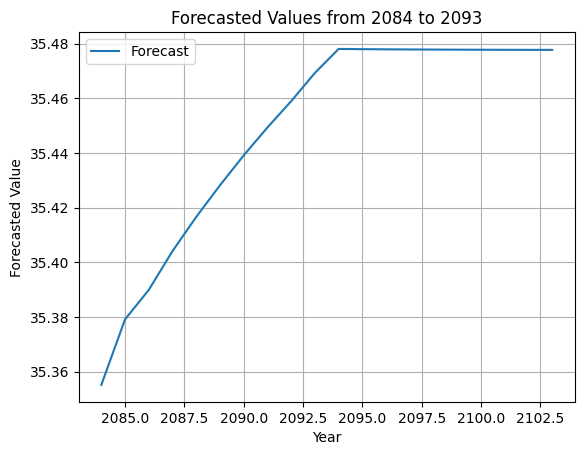

In [192]:
# Extend the training period to include data until the end of 2053
train = time_series_data['1993-01-31':'2083-01-01']

# SARIMA model training function
def train_model_SARIMA(train_data):
    try:
        model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        fitted_model = model.fit(maxiter=1000)  # Increase max iterations
        return fitted_model
    except LinAlgError as e:
        print("LinAlgError:", e)
        return None  # Return None if model fitting fails

# LSTM model training function
def train_model_LSTM(train_data):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

    # Prepare data for LSTM
    def create_dataset(data, time_steps=1):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:(i + time_steps), 0])
            y.append(data[i + time_steps, 0])
        return np.array(X), np.array(y)

    time_steps = 10
    X_train, y_train = create_dataset(train_data_scaled, time_steps)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32)

    return model

# Combine forecasts function
def combine_forecasts(forecast_1, forecast_2, forecast_3, year):
    weight_1 = 0.4
    weight_2 = 0.3
    weight_3 = 0.5
    return (weight_1 * forecast_1) + (weight_2 * forecast_2) + (weight_3 * forecast_3)

# Check if the training data is empty
if train.empty:
    print("Error: The training data is empty.")
    exit()

# Step 2: Choose Base Models
base_model_1 = train_model_SARIMA(train)
base_model_2 = train_model_LSTM(train)

# Check if the base models are None
if base_model_1 is None or base_model_2 is None:
    print("Error: Model training failed.")
    exit()

# Step 3: Exponential Smoothing
model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fitted_model_ets = model_ets.fit()

# Step 4: Forecasting
forecasts = []
for year in range(2084, 2104):  # Change the range to forecast for the next 10 years (2064-2073)
    forecast_1 = base_model_1.forecast(steps=1)[-1]
    forecast_2 = base_model_2.predict(np.array(train[-10:]).reshape(1, -1, 1))[0][0]
    forecast_3 = fitted_model_ets.forecast(1)[0]
    combined_forecast = combine_forecasts(forecast_1, forecast_2, forecast_3, year)
    forecasts.append(combined_forecast)
    train = pd.concat([train, pd.Series([combined_forecast], index=[pd.to_datetime(f'{year}-01-01')])])

# Post-processing, evaluation, etc.
# Display forecasts
forecast_years = range(2084, 2104)
plt.plot(forecast_years, forecasts, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values from 2084 to 2093')
plt.legend()
plt.grid(True)
plt.show()

In [193]:
forecasts

[35.35518542836692,
 35.37916666577843,
 35.389945784316325,
 35.40413731645134,
 35.416632548079754,
 35.42819801877525,
 35.439135924086834,
 35.44934333871391,
 35.4589530856469,
 35.46928366731193,
 35.47805971215752,
 35.47797473977592,
 35.4779140860894,
 35.47786215852287,
 35.477819672332075,
 35.47778505395439,
 35.47775672982719,
 35.47773441384818,
 35.477717819915085,
 35.47770608972099]

In [194]:
# Post-processing: Add forecasts to the original training dataset
for year, forecast_value in zip(range(2084, 2104), forecasts):
    train.loc[pd.to_datetime(f'{year}-01-01')] = forecast_value

In [195]:
train

1993-01-31   -37.475992
1993-02-28   -58.661277
1993-03-31   -79.268546
1993-04-30   -71.827592
1993-05-31   -61.476040
                ...    
2099-01-01    35.477785
2100-01-01    35.477757
2101-01-01    35.477734
2102-01-01    35.477718
2103-01-01    35.477706
Length: 393, dtype: float64

In [196]:
train.to_csv('/content/train_7.csv')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Epoch 1/100
12/12 [==============================] - 10s 21ms/step - loss: 0.1162
Epoch 2/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0574
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0540
Epoch 4/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0516
Epoch 5/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0497
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0476
Epoch 7/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0469
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0460
Epoch 9/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0457
Epoch 10/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0451
Epoch 11/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0441
Epoch 12/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0424
Epoch 13/100
12/12 [====

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


1/1 [==============================] - 0s 32ms/step


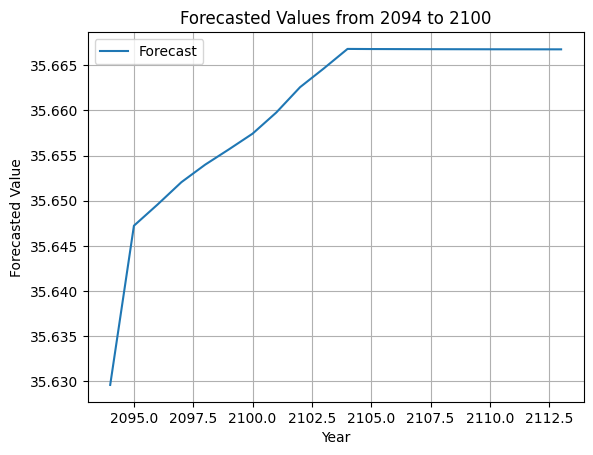

In [197]:
# Extend the training period to include data until the end of 2053
train = time_series_data['1993-01-31':'2093-01-01']

# SARIMA model training function
def train_model_SARIMA(train_data):
    try:
        model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        fitted_model = model.fit(maxiter=1000)  # Increase max iterations
        return fitted_model
    except LinAlgError as e:
        print("LinAlgError:", e)
        return None  # Return None if model fitting fails

# LSTM model training function
def train_model_LSTM(train_data):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))

    # Prepare data for LSTM
    def create_dataset(data, time_steps=1):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:(i + time_steps), 0])
            y.append(data[i + time_steps, 0])
        return np.array(X), np.array(y)

    time_steps = 10
    X_train, y_train = create_dataset(train_data_scaled, time_steps)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train LSTM model
    model.fit(X_train, y_train, epochs=100, batch_size=32)

    return model

# Combine forecasts function
def combine_forecasts(forecast_1, forecast_2, forecast_3, year):
    weight_1 = 0.4
    weight_2 = 0.4
    weight_3 = 0.5
    return (weight_1 * forecast_1) + (weight_2 * forecast_2) + (weight_3 * forecast_3)

# Check if the training data is empty
if train.empty:
    print("Error: The training data is empty.")
    exit()

# Step 2: Choose Base Models
base_model_1 = train_model_SARIMA(train)
base_model_2 = train_model_LSTM(train)

# Check if the base models are None
if base_model_1 is None or base_model_2 is None:
    print("Error: Model training failed.")
    exit()

# Step 3: Exponential Smoothing
model_ets = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fitted_model_ets = model_ets.fit()

# Step 4: Forecasting
forecasts = []
for year in range(2094, 2114):  # Change the range to forecast for the next 10 years (2064-2073)
    forecast_1 = base_model_1.forecast(steps=1)[-1]
    forecast_2 = base_model_2.predict(np.array(train[-10:]).reshape(1, -1, 1))[0][0]
    forecast_3 = fitted_model_ets.forecast(1)[0]
    combined_forecast = combine_forecasts(forecast_1, forecast_2, forecast_3, year)
    forecasts.append(combined_forecast)
    train = pd.concat([train, pd.Series([combined_forecast], index=[pd.to_datetime(f'{year}-01-01')])])

# Post-processing, evaluation, etc.
# Display forecasts
forecast_years = range(2094, 2114)
plt.plot(forecast_years, forecasts, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Forecasted Value')
plt.title('Forecasted Values from 2094 to 2100')
plt.legend()
plt.grid(True)
plt.show()

In [198]:
forecasts

[35.6296173484185,
 35.6472349555352,
 35.649590435729294,
 35.65205263207939,
 35.65398782800224,
 35.655680599913865,
 35.65742200921562,
 35.65976499627617,
 35.66256364892509,
 35.664636460051796,
 35.66679834435966,
 35.6667848975518,
 35.666778794036176,
 35.66677240441825,
 35.66676706384209,
 35.66676267694022,
 35.666758576140666,
 35.66675581048515,
 35.666753330931925,
 35.66675209115532]

In [199]:
# Post-processing: Add forecasts to the original training dataset
for year, forecast_value in zip(range(2094, 2114), forecasts):
    train.loc[pd.to_datetime(f'{year}-01-01')] = forecast_value

In [200]:
train

1993-01-31   -37.475992
1993-02-28   -58.661277
1993-03-31   -79.268546
1993-04-30   -71.827592
1993-05-31   -61.476040
                ...    
2109-01-01    35.666763
2110-01-01    35.666759
2111-01-01    35.666756
2112-01-01    35.666753
2113-01-01    35.666752
Length: 393, dtype: float64

In [201]:
train.to_csv('/content/train_8.csv')

In [202]:
import tensorflow as tf

# Load the entire model including architecture, weights, and optimizer state
model = tf.keras.models.load_model('/content/model_na_4.hdf5')

In [203]:
model